In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


598

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | iona
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | waingapu
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | batagay-alyta
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | kushima
Processing Record 17 of Set 1 | lichtenburg
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | walvis bay
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | cameta
City not found. Skipping.

Processing Record 35 of Set 4 | klaksvik
Processing Record 36 of Set 4 | pelym
Processing Record 37 of Set 4 | pierre
Processing Record 38 of Set 4 | shenjiamen
Processing Record 39 of Set 4 | calama
Processing Record 40 of Set 4 | acari
Processing Record 41 of Set 4 | saint-joseph
Processing Record 42 of Set 4 | lompoc
Processing Record 43 of Set 4 | hualmay
Processing Record 44 of Set 4 | kruisfontein
Processing Record 45 of Set 4 | ordubad
Processing Record 46 of Set 4 | tsurugi
Processing Record 47 of Set 4 | mocuba
Processing Record 48 of Set 4 | bar harbor
Processing Record 49 of Set 4 | yatou
Processing Record 50 of Set 4 | camacha
Processing Record 1 of Set 5 | esmeraldas
Processing Record 2 of Set 5 | touros
Processing Record 3 of Set 5 | upernavik
Processing Record 4 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 5 | meulaboh
Processing Record 6 of Set 5 | halifax
Processing Record 7 of Set 5 | chicama
Processing Record 8 of Set 5 | dongkan
Proc

Processing Record 26 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 27 of Set 8 | lermontovka
Processing Record 28 of Set 8 | beringovskiy
Processing Record 29 of Set 8 | del rio
Processing Record 30 of Set 8 | sofiysk
City not found. Skipping...
Processing Record 31 of Set 8 | vardo
Processing Record 32 of Set 8 | corinto
Processing Record 33 of Set 8 | chernyshevskiy
Processing Record 34 of Set 8 | catalina
Processing Record 35 of Set 8 | vitim
Processing Record 36 of Set 8 | kawana waters
City not found. Skipping...
Processing Record 37 of Set 8 | tilichiki
Processing Record 38 of Set 8 | swellendam
Processing Record 39 of Set 8 | porto novo
Processing Record 40 of Set 8 | namibe
Processing Record 41 of Set 8 | shiyan
Processing Record 42 of Set 8 | teya
Processing Record 43 of Set 8 | acapulco
Processing Record 44 of Set 8 | phalodi
Processing Record 45 of Set 8 | pochutla
Processing Record 46 of Set 8 | longyearbyen
Processing Record 47 of Set 8 | shahpura
Proce

Processing Record 11 of Set 12 | olot
Processing Record 12 of Set 12 | lakselv
Processing Record 13 of Set 12 | eureka
Processing Record 14 of Set 12 | lodwar
Processing Record 15 of Set 12 | takob
City not found. Skipping...
Processing Record 16 of Set 12 | cap malheureux
Processing Record 17 of Set 12 | axim
Processing Record 18 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 19 of Set 12 | hawalli
Processing Record 20 of Set 12 | sept-iles
Processing Record 21 of Set 12 | byron bay
Processing Record 22 of Set 12 | stornoway
Processing Record 23 of Set 12 | kawalu
Processing Record 24 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 25 of Set 12 | bujanovac
Processing Record 26 of Set 12 | nanchong
Processing Record 27 of Set 12 | fort walton beach
Processing Record 28 of Set 12 | kirakira
Processing Record 29 of Set 12 | fazilka
Processing Record 30 of Set 12 | tiznit
Processing Record 31 of Set 12 | ambulu
Processing Record 32 of Set 12 | vosto

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,24.80,96,99,6.49,RU,2022-01-29 14:43:18
1,Iona,26.5204,-81.9640,55.00,53,0,5.99,US,2022-01-29 14:43:16
2,Rikitea,-23.1203,-134.9692,76.32,78,100,9.75,PF,2022-01-29 14:43:06
3,Ribeira Grande,38.5167,-28.7000,64.80,52,20,5.75,PT,2022-01-29 14:46:39
4,Mataura,-46.1927,168.8643,62.47,86,100,2.13,NZ,2022-01-29 14:43:12
5,Port Alfred,-33.5906,26.8910,73.06,60,15,11.16,ZA,2022-01-29 14:43:46
6,Ushuaia,-54.8000,-68.3000,60.42,72,75,6.91,AR,2022-01-29 14:45:36
7,Waingapu,-9.6567,120.2641,79.86,81,100,8.61,ID,2022-01-29 14:46:56
8,Cape Town,-33.9258,18.4232,75.61,59,0,5.99,ZA,2022-01-29 14:43:56
9,Busselton,-33.6500,115.3333,73.09,86,0,16.06,AU,2022-01-29 14:43:08


In [8]:
# new_column_order = ["City", "Country", "Data", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[ ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2022-01-29 14:43:18,59.7035,30.7861,24.80,96,99,6.49
1,Iona,US,2022-01-29 14:43:16,26.5204,-81.9640,55.00,53,0,5.99
2,Rikitea,PF,2022-01-29 14:43:06,-23.1203,-134.9692,76.32,78,100,9.75
3,Ribeira Grande,PT,2022-01-29 14:46:39,38.5167,-28.7000,64.80,52,20,5.75
4,Mataura,NZ,2022-01-29 14:43:12,-46.1927,168.8643,62.47,86,100,2.13
5,Port Alfred,ZA,2022-01-29 14:43:46,-33.5906,26.8910,73.06,60,15,11.16
6,Ushuaia,AR,2022-01-29 14:45:36,-54.8000,-68.3000,60.42,72,75,6.91
7,Waingapu,ID,2022-01-29 14:46:56,-9.6567,120.2641,79.86,81,100,8.61
8,Cape Town,ZA,2022-01-29 14:43:56,-33.9258,18.4232,75.61,59,0,5.99
9,Busselton,AU,2022-01-29 14:43:08,-33.6500,115.3333,73.09,86,0,16.06


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


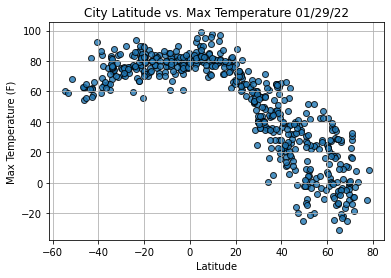

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


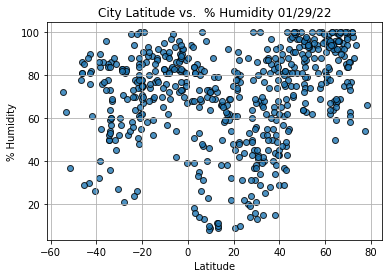

In [12]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs.  % Humidity "+ time.strftime("%x"))
plt.ylabel("% Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


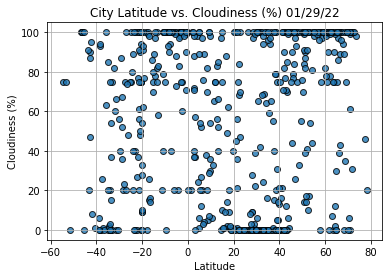

In [13]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()


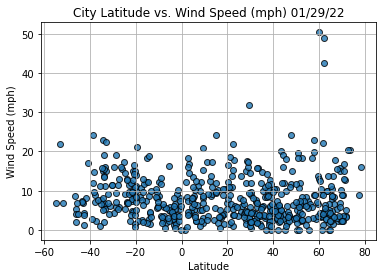

In [14]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()


In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [16]:
index13 = city_data_df.loc[13]
index13


City                       Castro
Country                        BR
Date          2022-01-29 14:43:58
Lat                      -24.7911
Lng                      -50.0119
Max Temp                    59.36
Humidity                       99
Cloudiness                    100
Wind Speed                   5.32
Name: 13, dtype: object

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


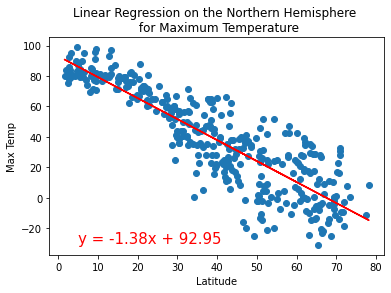

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature",
                       "Max Temp", (5,-30))


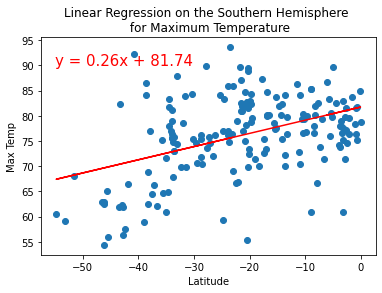

In [29]:
# Linear regression on theSouthern Hemisphere
x_values =southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", 
                       "Max Temp", (-55,90))


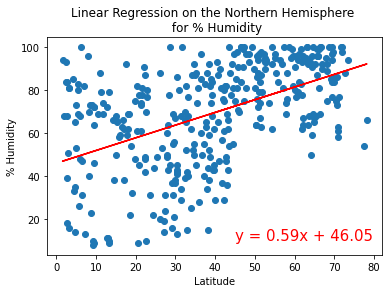

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity",
                       "% Humidity", (45,10))


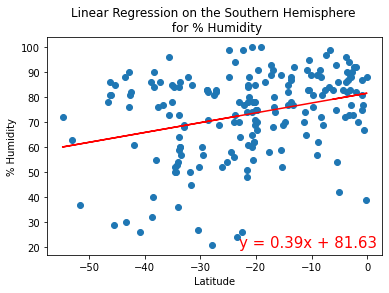

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity",
                       "% Humidity", (-23, 20))


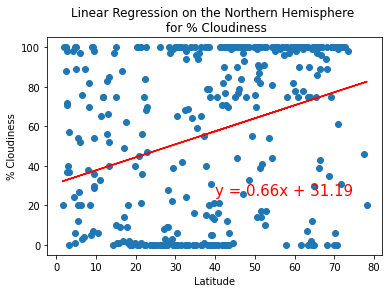

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                       "% Cloudiness", (40,25))


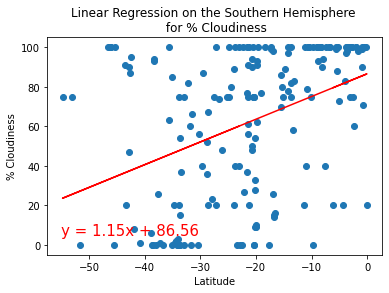

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                       "% Cloudiness", (-55,5))


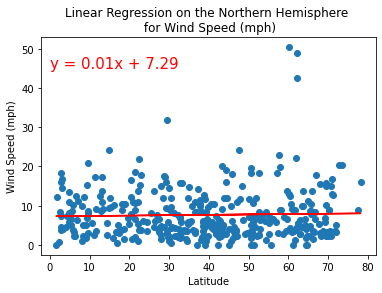

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed (mph)",
                       "Wind Speed (mph)", (0,45))


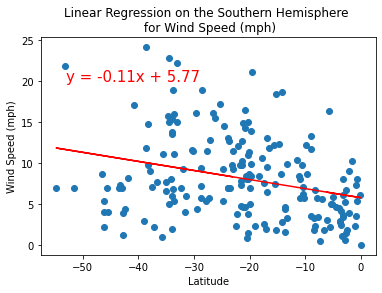

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values =southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed (mph)",
                       "Wind Speed (mph)", (-53,20))
